In [1]:
# !pip install corner
# !pip install emcee

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import emcee

In [3]:
def model(x, params):
    k, b = params
    return k * x + b

def generate_data(params):
    num = 20
    sigma = 1
    x = np.linspace(0, 10, num)
    y_model = model(x, params)
    y_data = y_model + \
             np.random.normal(0, sigma, num)
    sigma_list = sigma * np.ones(num)
    return x, y_data, sigma_list

PARAMS_TRUE = [1, 3]
x_list, y_data_list, sigma_list = \
    generate_data(PARAMS_TRUE)


In [4]:
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * \
           np.exp(-(x - mu)**2 / (2 * sigma**2))

In [5]:
def log_prob(x, mu, sigma):
    likelihood = gaussian(x, mu, sigma)
    return np.log(likelihood)

ndim = 1
nwalkers = 2 * ndim

mu = 1.0
sigma = 2.0
start_pos = np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[mu, sigma])
res = sampler.run_mcmc(start_pos, 10000)

In [6]:
samples = sampler.get_chain(flat=True)
samples.shape

(20000, 1)

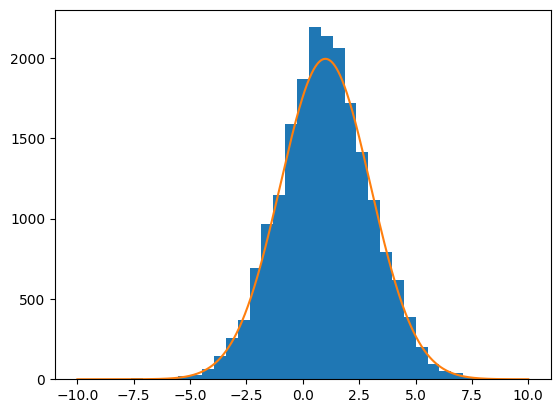

In [7]:
plt.hist(samples, bins=30);

x = np.linspace(-10, 10, 1000)
plt.plot(x, 10000 * gaussian(x, mu=1.0, sigma=2.0))

In [8]:
def gauss2d(x, y, xc, yc, x_sigma, y_sigma):
    px = gaussian(x, xc, x_sigma)
    py = gaussian(y, yc, y_sigma)
    pxpy = px * py
    return pxpy

In [9]:
def log_prob(params, xc, yc, x_sigma, y_sigma):
    x, y = params
    likelihood = gauss2d(x, y, xc, yc, x_sigma, y_sigma)
    return np.log(likelihood)

ndim = 2
nwalkers = 2 * ndim

xc = 1.0
yc = 2.0
x_sigma = 0.2
y_sigma = 0.5
start_pos = np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[xc, yc, x_sigma, y_sigma])
res = sampler.run_mcmc(start_pos, 10000)

In [10]:
samples = sampler.get_chain(flat=True)
samples.shape

(40000, 2)

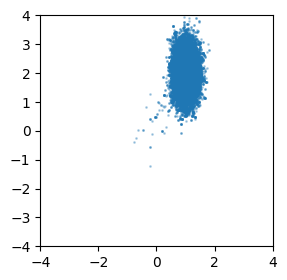

In [11]:
plt.figure(figsize=(3, 3))
plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.3);
plt.xlim(-4, 4);
plt.ylim(-4, 4);